## Data In high dimensions / The curse of dimensionality
Random vectors in high dimension behave very differently from low dimensional vectors. 

Our intuition fails us.

For a better understanding, rely on the law of large numbers and central limit theorem.

In [1]:
from lib.Kmeans_generate_and_analyze import *
from numpy.random import randint


In [2]:
def gen_data(k=2,n=1000,d=2,radius=5):
    df,centers=create_data(k,n,d,radius=radius)
    #print(centers)
    M=np.array(df.iloc[:,:-1])
    return M

def my_hist(L,_title,one_side=True,_xlim=[-10,10]):
    hist(L,bins=50);
    title(_title)
    if one_side:
        xlim([0,max(L)*1.3])
    else:
        xlim(_xlim)
    
    grid()
    return None

## Single gaussian
We start with the simplest high dimensional distribution: A gaussian with mean zero and std 1 in all directions.

### The length of a random vector
* $\vec{x}$ is a random vector drawn from a gaussian centered at zero.
* For $d=2$: $\|\vec{x}\|$ is around std=1
* For $d \to \infty$ the diatribution of $\|\vec{x}\|$ becomes concentrated around $\sqrt{d}$

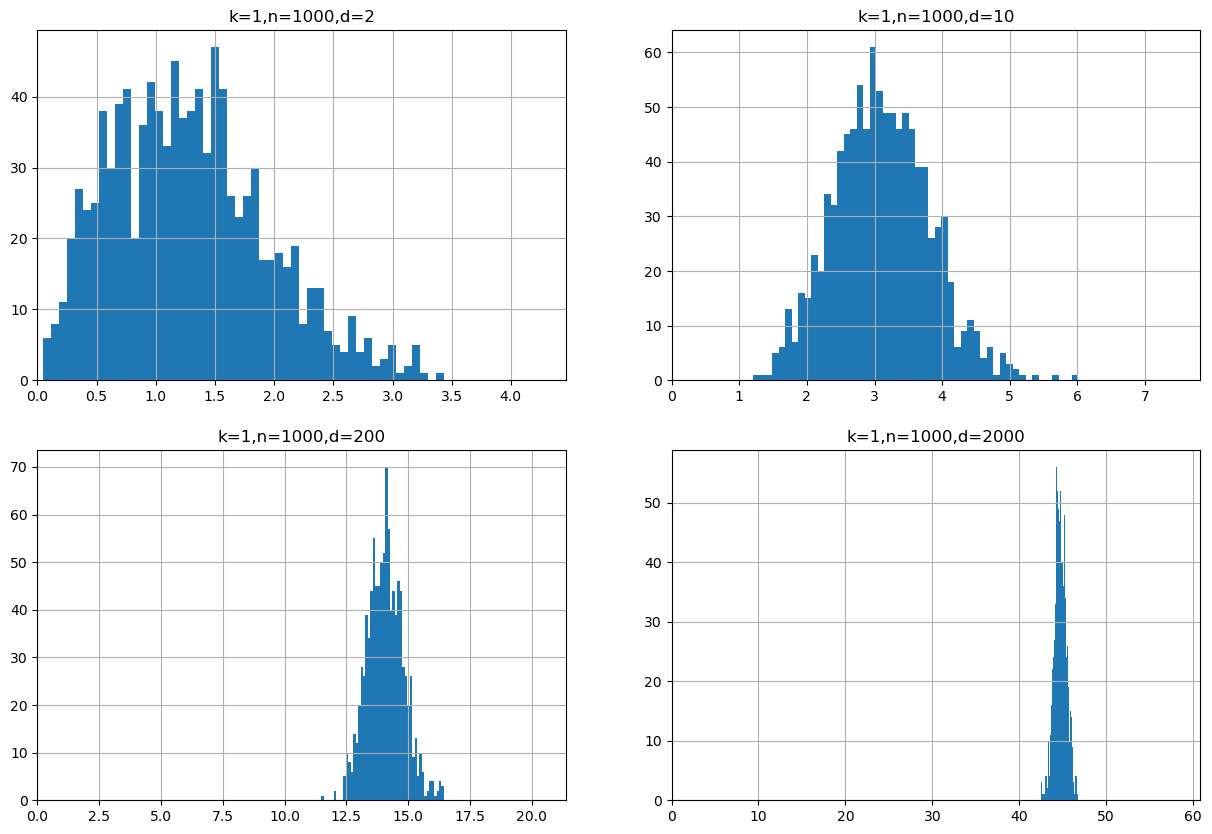

In [3]:
_d=[2,10,200,2000]
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=1;n=1000;d=_d[i]
    M=gen_data(k,n,d,radius=0.0)
    L=np.sqrt(np.sum(M**2,axis=1))
    my_hist(L,_title='k=%d,n=%d,d=%d'%(k,n,d))

### What is the explanation?

* The length of $\vec{x}$ is 
$$\sqrt{\sum_{i=1}^d x_i^2}$$

* Because the distribution is gaussian, the terms $x_i^2$ are independent.
* As the mean of the gaussian is zero, 
   * $E(x_i^2) = var(x_i) = 1$ (no dependence on $d$)
   * $var(x_i^2) = c \approx 1$ (no dependence on $d$)
* The mean of $\sum_{i=1}^d x_i^2$ is $d$ and the std is $\sqrt{cd}$
* The distribution of $\sum_{i=1}^d x_i^2$ is concentrated around $d$
* The distribution of $\sqrt{\sum_{i=1}^d x_i^2}$ is concentrated around $\sqrt{d}$

### What about the distance between two random vectors
drawn from the same gaussian.

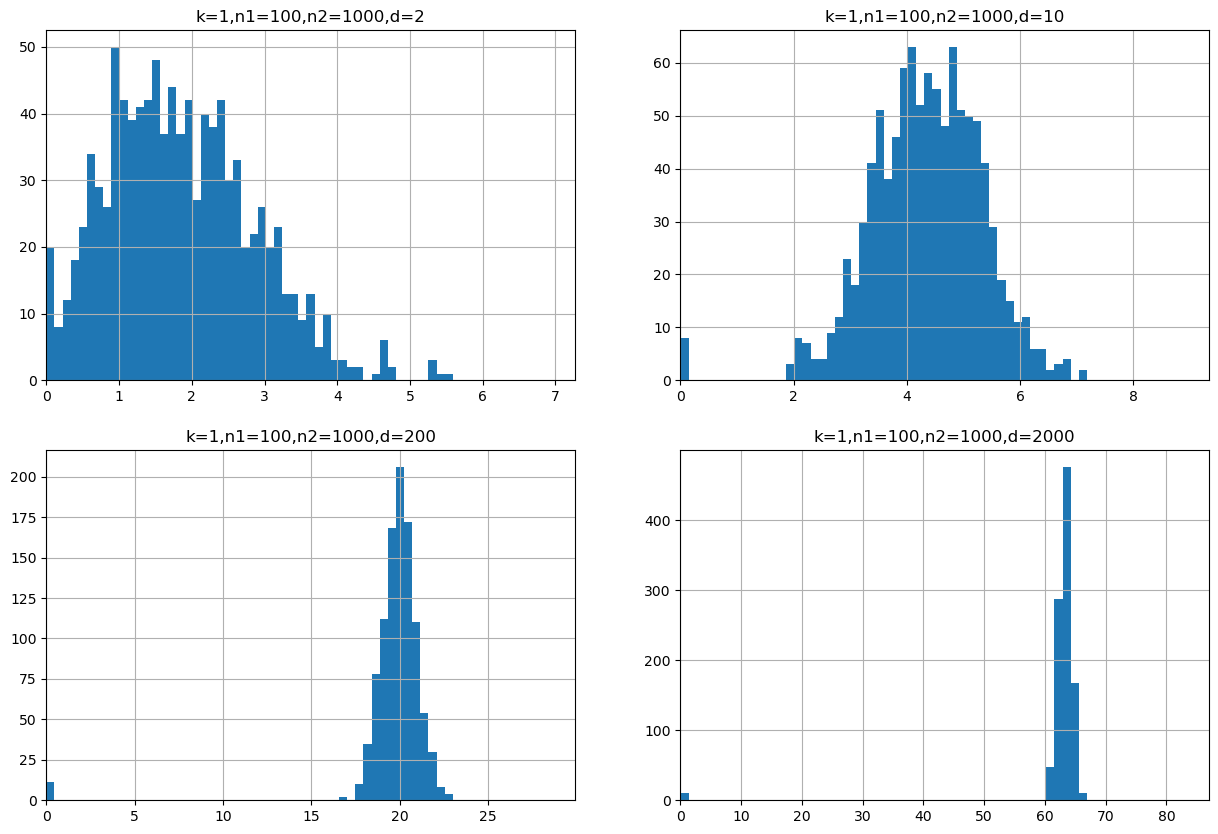

In [4]:
from numpy.random import choice

_d=[2,10,200,2000]
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=1;n1=100;n2=1000;d=_d[i]
    M=gen_data(k,n1,d,radius=0.0)
    # Randomly pair elements and calculate the difference.
    pair_diff=[]
    for ii in range(n2):
        i,j=choice(M.shape[0],2)
        pair_diff.append(M[i,:]-M[j,:])

    MP=np.stack(pair_diff)

    L=np.sqrt(np.sum(MP**2,axis=1))
    my_hist(L,_title='k=%d,n1=%d,n2=%d,d=%d'%(k,n1,n2,d))

## Two gaussians

Maybe this only happens when the vectors come from a single gaussian?

We consider data generated from two gaussian distributions. 
* mean1 at $x=(-5,0,0,0,...0)$
* mean2 at $x=(+5,0,0,0,...0)$
All the std are 1


### The Length of a random vector
If the data is two dimensional, it behaves like we would expect - most vectors have length close to 5.

As the dimension increases, the length of the vectors becomes dominated by the coordinates with mean 0.

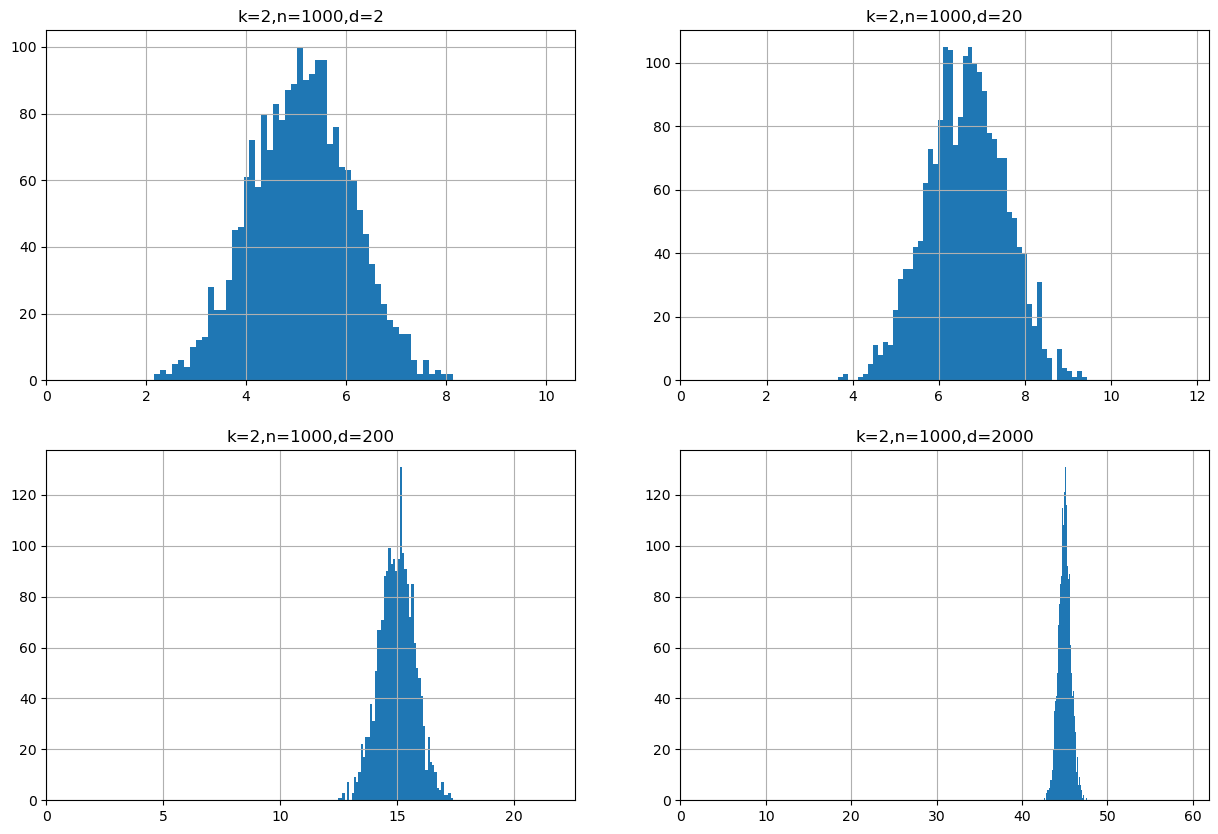

In [5]:
_d=[2,20,200,2000]
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=2;n=1000;d=_d[i]
    M=gen_data(k,n,d)
    L=np.sqrt(np.sum(M**2,axis=1))
    my_hist(L,_title='k=%d,n=%d,d=%d'%(k,n,d))

### Compare with a single gaussian
* In $d=2000$, the distributions are almost the same: concentrated around $\sqrt{2000} \approx 45$
* We cannot use distance distribution to distinguish $k=1$ and $k=2$.

### Distance between two points

We have two spherical gaussians with std 1, 
* mean1 at $x=(-5,0,0,0,...0)$
* mean2 at $x=(+5,0,0,0,...0)$

When we have just two dimensions there is a clear distinction between small distances - where the two points are in the same cluster, and large distances, where they belong to different clusters.

As the dimension increases, the distance between two points becomes dominated by the $d-1$ dimensions where there is no separation.

At very high dimension, the distance between two points in the same cluster is indistinguishable from the distance between two points in different clusters.

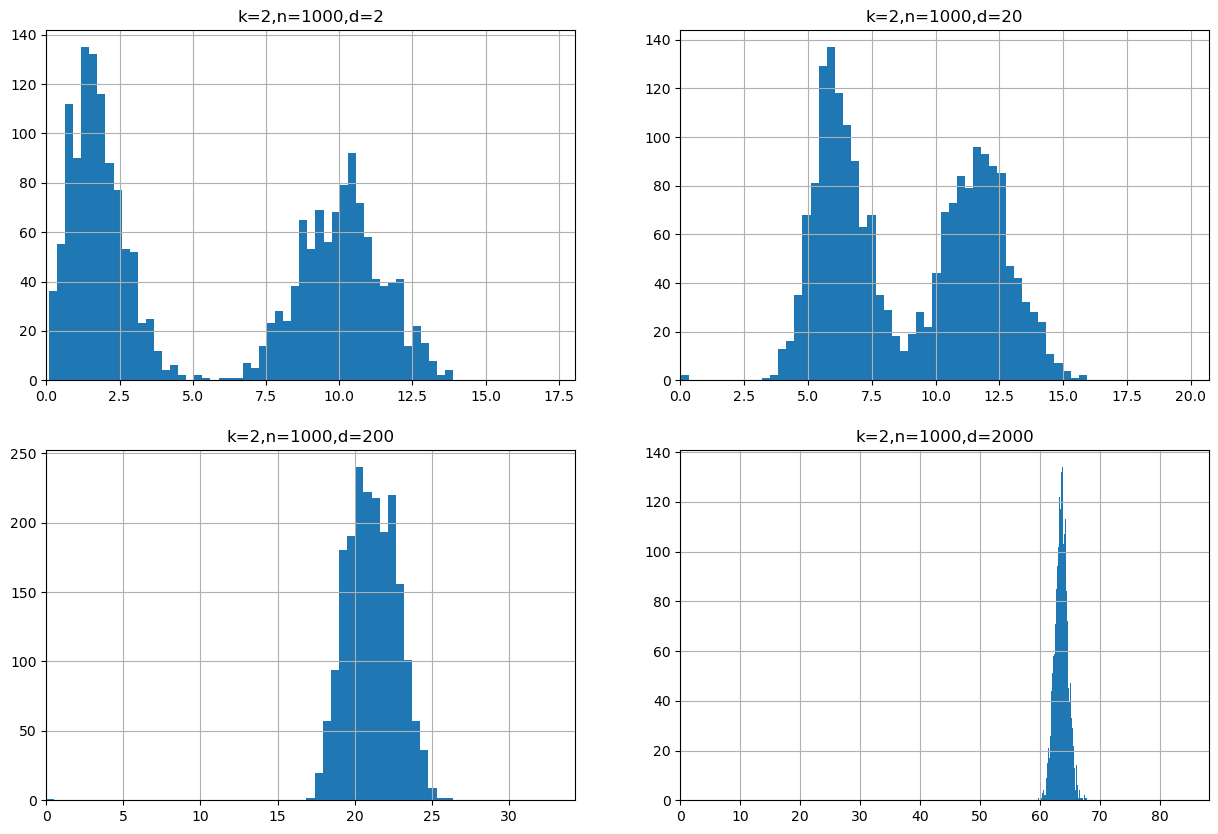

In [6]:
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=2;n=1000;d=_d[i]
    M=gen_data(k,n,d)
    l=M.shape[0]
    I=randint(l,size=[l,2])

    X0=M[I[:,0],:]
    X1=M[I[:,1],:]
    L=np.sqrt(np.sum((X0-X1)**2,axis=1))

    my_hist(L,_title='k=%d,n=%d,d=%d'%(k,n,d))

### K-nearest-neighbors fails in high dimensions
* Suppose one gaussian is labeled +1 and the other -1.
* Can we use the k-NN classifier to identify the cluster from which the data point came?
* In low dimension - yes.
* In high dimensions - no. 
* Given two vectors, the distance between them is about $\sqrt{d}$ regardless of whether they are from the same or opposite clusters.

## Dot Products

When we take the dot product between two random vectors we expect that, because of the two clusters, the result would be concentrater around $5\times -5 = -25$ or $5\times 5=+25$.

That is true for dimension 2 and for dimension 20. But when we reach dimenson 200, the peaks have a large overlap, and when we reach 2000 they are indistinguishable.

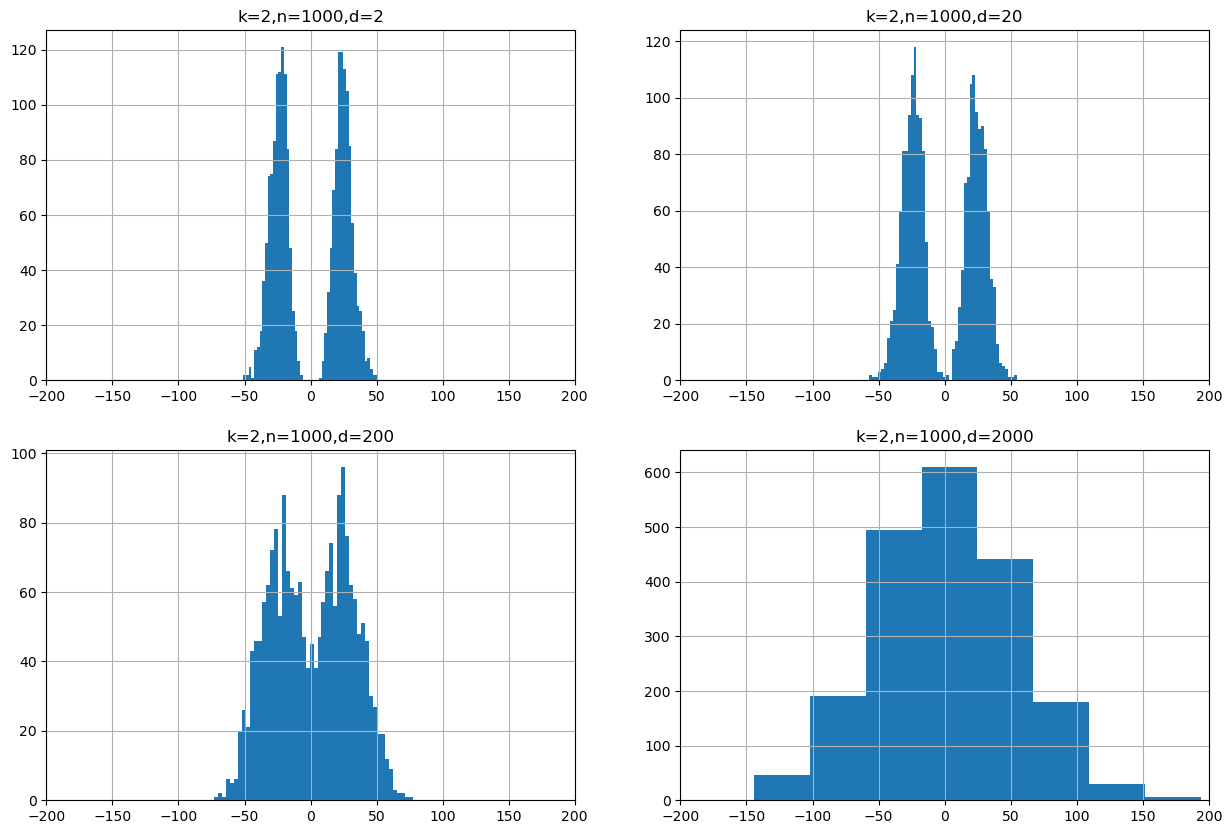

In [7]:
figure(figsize=[15,10])
for i in range(len(_d)):
    subplot(2,2,i+1);
    k=2;n=1000;d=_d[i]
    M=gen_data(k,n,d,radius=5)
    l=M.shape[0]
    I=randint(l,size=[l,2])

    X0=M[I[:,0],:]
    X1=M[I[:,1],:]
    L=np.sum(X0*X1,axis=1)

    my_hist(L,_title='k=%d,n=%d,d=%d'%(k,n,d),one_side=False,_xlim=[-200,200])


### Summary

* The 2d and 3D intuitions break down at high dimensions. The lengths of vectors, the distance between vectors and the dot products between vectors all become highly concentrated and therefor not informative.
* **The curse of dimensionality** : Most statistical methods break down at high dimensions.
* A way out: some high dimensional data has low **intrinsic dimension** 
* for example: **small number of PCA eigenvectors explain alarge fraction of the variance.**